In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = datasets.load_breast_cancer()
X = data.data
y = data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
svm_classifier = SVC(kernel='linear', C=1)
svm_classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [6]:
y_pred = svm_classifier.predict(X_test)


In [7]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [8]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [9]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

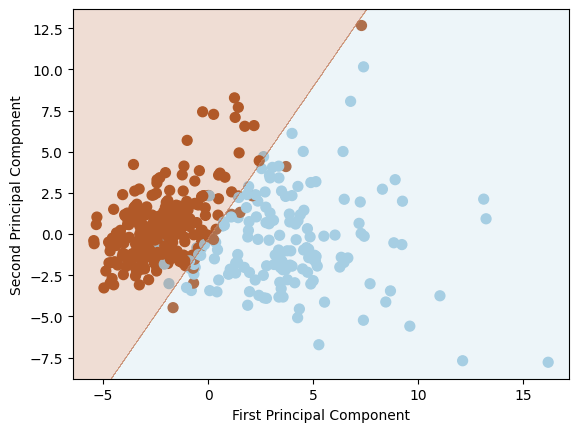

In [10]:
# Plot the training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, s=50, label="Training Data")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot the decision boundary
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [11]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.972027972027972
Confusion Matrix:
 [[52  2]
 [ 2 87]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid
param_grid = [
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf', 'linear','poly']},
]

# Initialize SVM classifier
svm_classifier = SVC()

# Apply GridSearchCV
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)  # cv=5 for 5-fold cross-validation
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")


Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [13]:
# Predict using the best estimator
y_pred_best = best_estimator.predict(X_test)

# Calculate metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

# Print the results
print(f"Accuracy: {accuracy_best}")
print(f"Confusion Matrix:\n{conf_matrix_best}")
print(f"Classification Report:\n{classification_rep_best}")


Accuracy: 0.972027972027972
Confusion Matrix:
[[52  2]
 [ 2 87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        54
           1       0.98      0.98      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

